In [97]:
import igraph
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from igraph import *

g1 = Graph.Read_GraphML('../bib_data/1990-2005/pre_2006_3.graphml')
g2 = Graph.Read_GraphML('../bib_data/1990-2017/all_years_3.graphml')

In [167]:
def cluster_distance(g):

    sp = g.shortest_paths()

    cl_dict = []

    clusters = [x['cluster'] for x in g.vs]

    cl = list(set(clusters))

    for c in cl:
        nodes = [index for index, value in enumerate(clusters) if value == c]
        l = len(nodes)
        cl_dict.append({'cluster':c,'nodes':nodes,'l':l})

    w, h = len(cl)+1,len(cl)+1;
    cmat = [[0 for x in range(w)] for y in range(h)] 

    # for each cluster
    for index,c in enumerate(cl_dict):
        cnodes = [sp[i] for i in cl_dict[index]['nodes']]
        for cindex,cc in enumerate(cl):
            means = []
            for j in cnodes:
                means.append(np.mean([j[i] for i in cl_dict[cindex]['nodes']]))
            c['cluster_distance_{}'.format(cc)] = np.mean(means)
            cmat[index+1][cindex+1] = np.mean(means)
            
    return( cmat )


def cluster_centrality(g):

    clusters = [x['cluster'] for x in g.vs]
    cl = list(set(clusters))

    c_cent = []

    degr = g.degree()
    betw = g.betweenness()

    for c in cl:
        nodes = [index for index, value in enumerate(clusters) if value == c]
        nc = [betw[i] for i in nodes]
        d = [degr[i] for i in nodes]
        c_cent.append({
            'cluster': c,
            'betweenness': np.mean(nc),
            'degree': np.mean(d)
        })

    return(c_cent)

           
    
def network_centrality(g):
    df = pd.DataFrame()

    df['label'] = g.vs['label']
    df['cluster'] = g.vs['cluster']
    df['betweenness'] = g.betweenness()
    df['norm_cit_score'] = g.vs['score<norm._citations>']
    df['degree'] = g.degree()
    
    return(df)


In [168]:
df1 = pd.DataFrame(cluster_distance(g1)).iloc[1:,1:]

ax = sns.heatmap(df1)

plt.savefig('../bib_data/1990-2005/cluster_distance.png',bbox_inches='tight', width=8,height=5)

plt.show()

df1.to_excel('../bib_data/1990-2005/cluster_distance.xlsx')

df1.head()


AttributeError: 'Graph' object has no attribute 'distances'

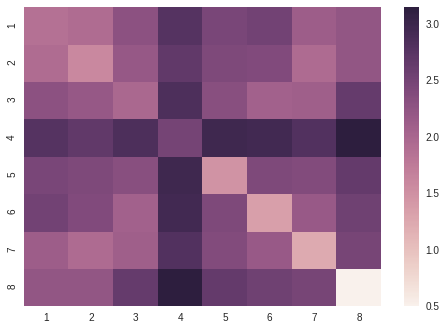

,1,2,3,4,5,6,7,8
1,1.868069,1.931001,2.291930,2.776809,2.457727,2.521126,2.120864,2.233333
2,1.931001,1.588113,2.194926,2.672641,2.414359,2.396761,1.941045,2.230994
3,2.291930,2.194926,1.982432,2.846640,2.333364,2.062191,2.093826,2.637195
4,2.776809,2.672641,2.846640,2.491719,2.973069,2.942493,2.796127,3.147059
5,2.457727,2.414359,2.333364,2.973069,1.474379,2.416337,2.391340,2.656627
6,2.521126,2.396761,2.062191,2.942493,2.416337,1.353905,2.169406,2.555944
7,2.120864,1.941045,2.093826,2.796127,2.391340,2.169406,1.232500,2.475000
8,2.233333,2.230994,2.637195,3.147059,2.656627,2.555944,2.475000,0.500000


In [166]:
df2 = pd.DataFrame(cluster_distance(g2)).iloc[1:,1:]

ax = sns.heatmap(df2)

plt.savefig('../bib_data/1990-2017/cluster_distance',bbox_inches='tight', width=8,height=5)

plt.show()


df2.to_excel('../bib_data/1990-2017/cluster_distance.xlsx')

df2.head(10)

In [142]:
c1 = pd.DataFrame(cluster_centrality(g1))

c1.to_excel('../bib_data/1990-2005/cluster_centrality.xlsx')

c2 = pd.DataFrame(cluster_centrality(g2))

c2.to_excel('../bib_data/1990-2017/cluster_centrality.xlsx')

In [165]:
d1 = network_centrality(g1)

d1.to_excel('../bib_data/1990-2005/network_centrality.xlsx')

d2 = network_centrality(g2)

d2.to_excel('../bib_data/1990-2017/network_centrality.xlsx')

In [169]:
g2.farthest_points()

(11, 1572, 6)

In [177]:
print(g2.vs['label'][11])
print(g2.vs['cluster'][11])
print(g2.vs['label'][1572])
print(g2.vs['cluster'][1572])

xu (1995)
1.0
hao (2011)
4.0
